In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from logistic_regression import LogisticRegressionGD
from extrapolation import *
from experiments import Experiment

In [3]:
device = "cpu"

X = []
with open("../../../madelon_train.data") as f:
    for line in f:
        X.append([float(x) for x in line.split()])
X = np.array(X)
X /= X.max()
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
X = torch.tensor(X, device=device)
with open("../../../madelon_train.labels") as f:
    y = [int(x) for x in f]
y = torch.tensor(y, device=device)
X.shape, y.shape

(torch.Size([2000, 501]), torch.Size([2000]))

In [4]:
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

$\tau = 10^7$

In [5]:
model = LogisticRegressionGD(X_train, y_train, 1e7, device=device)

In [6]:
model.run_steps(5000)

In [7]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.4950, dtype=torch.float64)

In [8]:
len(model.log)

5001

In [9]:
k = 6
experiment = Experiment(model.log, model.obj, values=model.value_log, device=device)

In [10]:
experiment.run_method("RRE+QR", RRE, k, method_kwargs={"qr": True})

In [11]:
experiment.run_method("RNA", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": False, "norm": False})

In [12]:
experiment.run_method("RNA+norm", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [13]:
experiment.run_method("RNA+ls", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": True})

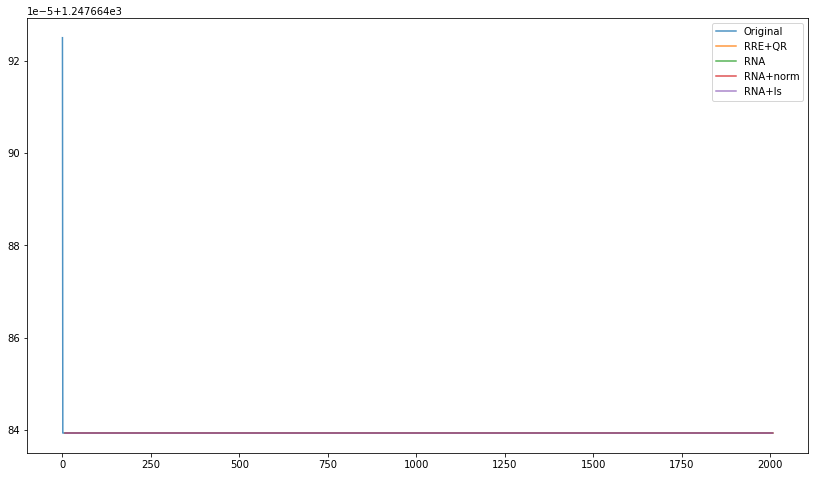

In [14]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=2000)
plt.legend()

../../experiments.py:66: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.arange(n), np.log10(np.abs(np.array(self.values[:n]) - best)), label="Original", alpha=0.8)
../../experiments.py:70: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:70: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:70: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),
../../experiments.py:70: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x)]) - best)),


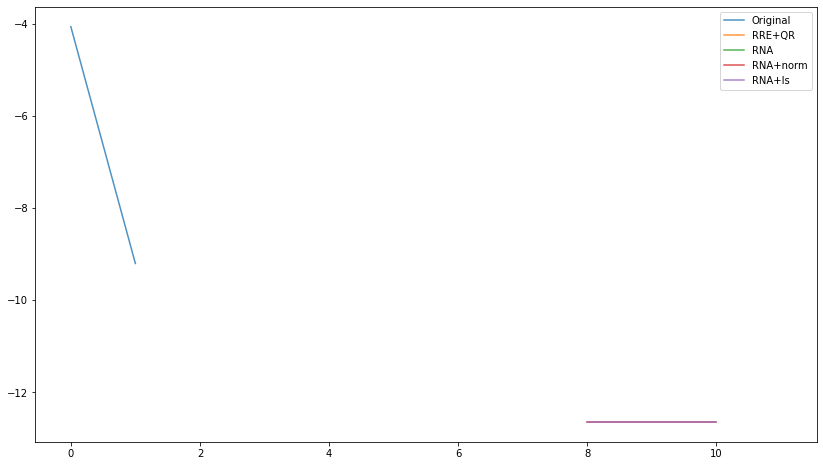

In [15]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=2000)
plt.legend()

In [16]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.4950, dtype=torch.float64)

In [17]:
df = experiment.value_df()
df.to_csv(f"results/madelon:tau=1e7.csv")

$\tau = 10^2$

In [18]:
model = LogisticRegressionGD(X_train, y_train, 1e2, device=device)

In [19]:
model.fit(1e-8, max_iter=100500)

In [20]:
len(model.log)

2621

In [31]:
k = 6
experiment = Experiment(model.log, model.obj, values=model.value_log, device=device)

In [32]:
experiment.run_method("RRE+QR", RRE, k, method_kwargs={"qr": True})

In [33]:
experiment.run_method("Regularized RRE", regularized_RRE, k, method_kwargs={"lambda_": 1e-15})

In [34]:
experiment.run_method("RNA", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": False, "norm": False})

In [35]:
experiment.run_method("RNA+norm", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [36]:
experiment.run_method("RNA+ls", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": True})

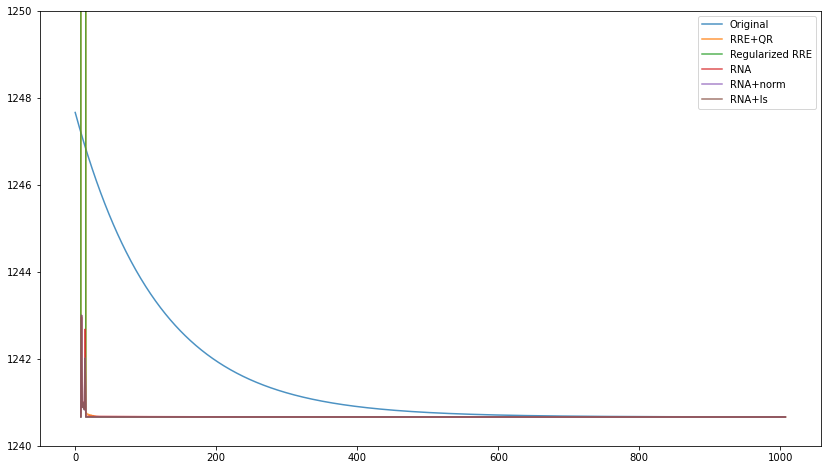

In [46]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=1000)
plt.ylim(1240, 1250)
plt.legend()

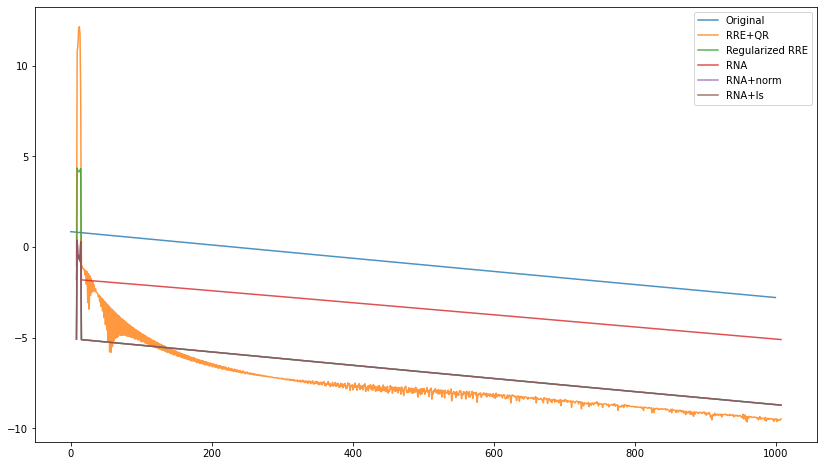

In [38]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=1000)
plt.legend()

In [39]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

In [40]:
df = experiment.value_df()
df.to_csv(f"results/madelon:tau=1e2.csv")

$\tau = 10^{-3}$

In [47]:
model = LogisticRegressionGD(X_train, y_train, 1e-3, device=device)

In [48]:
model.fit(1e-8, max_iter=100500)

In [49]:
len(model.log)

100501

In [50]:
k = 6
experiment = Experiment(model.log, model.obj, values=model.value_log, device=device)

In [51]:
experiment.run_method("RRE+QR", RRE, k, method_kwargs={"qr": True})

In [52]:
experiment.run_method("Regularized RRE", regularized_RRE, k, method_kwargs={"lambda_": 1e-10})

In [53]:
experiment.run_method("RNA", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": False, "norm": False})

In [54]:
experiment.run_method("RNA+norm", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [55]:
experiment.run_method("RNA+ls", RNA, k, method_kwargs={"lambda_range": (1e-15, 1e-2), "linesearch": True})

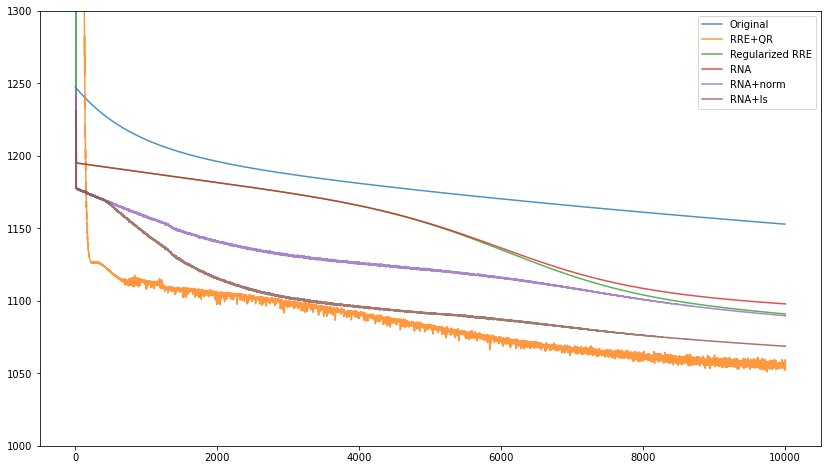

In [62]:
plt.figure(figsize=(14, 8))
experiment.plot_values(n=10000)
plt.ylim(1000, 1300)
plt.legend()

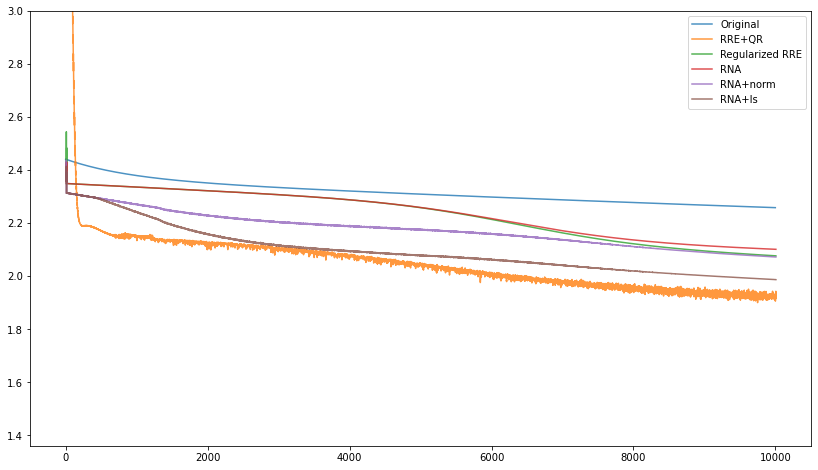

In [65]:
plt.figure(figsize=(14, 8))
experiment.plot_log_diff(n=10000)
plt.ylim(None, 3)
plt.legend()

In [66]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5450, dtype=torch.float64)

In [67]:
df = experiment.value_df()
df.to_csv(f"results/madelon:tau=1e-3.csv")